In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# zero prediction

In [2]:
sub=pd.read_csv('../submission/sub2_clustifier_week_mad.csv.gz',index_col=0)

In [3]:
zero_pred=sub['Visits']<0.5

In [4]:
zero_pred.mean()

0.017220104368446811

In [5]:
zero_pred.head()

Id
0b293039387a    False
7114389dd824    False
057b02ff1f09    False
bd2aca21caa3    False
c0effb42cdd5    False
Name: Visits, dtype: bool

# Weighted by loglp size

In [6]:
w=[[array([-4.39559937], dtype=float32), array([-4.91468716], dtype=float32)], [array([ 1.70440793], dtype=float32), array([ 0.00341442], dtype=float32)], [array([ 2.09683466], dtype=float32), array([ 0.01907348], dtype=float32)], [array([-0.94681334], dtype=float32), array([ 0.04782599], dtype=float32)], [array([ 2.29897046], dtype=float32), array([ 0.0009233], dtype=float32)], [array([-1.55307293], dtype=float32), array([-0.29954535], dtype=float32)]]

In [7]:
w

[[array([-4.39559937], dtype=float32), array([-4.91468716], dtype=float32)],
 [array([ 1.70440793], dtype=float32), array([ 0.00341442], dtype=float32)],
 [array([ 2.09683466], dtype=float32), array([ 0.01907348], dtype=float32)],
 [array([-0.94681334], dtype=float32), array([ 0.04782599], dtype=float32)],
 [array([ 2.29897046], dtype=float32), array([ 0.0009233], dtype=float32)],
 [array([-1.55307293], dtype=float32), array([-0.29954535], dtype=float32)]]

In [8]:
def f(m):
    #m=np.log(m+1)
    x=[]
    for (a,b) in w:
        a=a[0]
        b=b[0]
        x.append(a*m+b)
    x.append(m*0+1)
    x=np.array(x).T
    x=np.exp(x)
    return x/np.sum(x,1,keepdims=True)

In [9]:
ww=f(np.array([np.log(m+1) for m in range(1,100)]))
ww.shape  

(99, 7)

In [10]:
pred_files=["sub_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz",'sub_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz'
            ,'sub_pred_lstm1_60_medadj_nozero_noxpad.csv.gz','sub_pred_lstm1_60_512_nozero_xnopad.csv.gz',
           'sub_pred_lstm1_log_60_nozero_noxpad.csv.gz',
           'sub_pred_xgb_log_mix123.csv.gz','sub_clustifier_weekend_mad.csv.gz']
lengends=[u.replace("_nozero_noxpad.csv.gz","").replace("_nozero_xnopad.csv.gz","")\
          .replace('sub_pred_',"").replace('_mad.csv.gz',"") for u in pred_files]

In [11]:
assert len(pred_files)==len(w)+1

In [12]:
f(np.array([1]))

array([[  3.34284345e-06,   2.03807388e-01,   3.06513304e-01,
          1.50347722e-02,   3.68428544e-01,   5.79348925e-03,
          1.00419160e-01]])

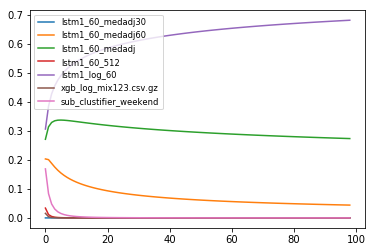

In [13]:
for i in range(ww.shape[1]):
    plt.plot(ww[:,i])
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
plt.legend(lengends, prop = fontP)

In [14]:
trainsize=pd.read_csv('../input/train_3_withlogsize.csv.gz',index_col=0)
trainsize.head()

logsize
Id                   
4ba4d551a031      3.1
60d27ad56a15      3.0
fd318ba35812      1.6
6f94c9eff16b      2.7
3d831f757952      2.8

In [15]:
trainsize.shape

(8993906, 1)

In [16]:
pred_files=np.array([u.replace('sub_','sub2_') for u in pred_files])

In [17]:
import os.path
for u in pred_files:
    assert os.path.isfile('../submission/'+u), u


In [18]:
pred_files

array(['sub2_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_medadj_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_512_nozero_xnopad.csv.gz',
       'sub2_pred_lstm1_log_60_nozero_noxpad.csv.gz',
       'sub2_pred_xgb_log_mix123.csv.gz',
       'sub2_clustifier_weekend_mad.csv.gz'],
      dtype='|S48')

In [19]:
%time df=pd.concat([pd.read_csv('../submission/'+u,index_col=0) for u in pred_files],axis=1)

CPU times: user 2min 7s, sys: 1.75 s, total: 2min 9s
Wall time: 2min 9s


In [20]:
df.shape,trainsize.shape

((8993906, 7), (8993906, 1))

In [22]:
df.head()

Visits  Visits  Visits  Visits  Visits  Visits  Visits
0000009abb1c    13.7   117.7   117.1    87.3   101.4   111.5   119.5
0000023b7434     9.5     9.0     9.4     9.7     9.2     9.2     9.0
000002ddbe6e    92.8    86.2    90.8    89.0    84.1    87.3    88.5
0000032f82ac   878.7   785.2   840.5   841.8   782.4   806.7   752.5
000003e266a3    39.4    42.5    42.2    39.0    42.9    42.5    42.0

In [21]:
df.head()

Visits  Visits  Visits  Visits  Visits  Visits  Visits
0000009abb1c    22.7   107.4   113.5    74.4    99.2    88.8   119.5
0000023b7434     8.5     7.9     8.9     8.5     8.3     8.5     8.5
000002ddbe6e   102.6    96.6   101.9    98.0    94.3   102.1    96.0
0000032f82ac   895.2   811.4   858.3   842.7   786.8   831.6   768.0
000003e266a3    57.6    69.3    57.4    62.8    70.2    86.2    42.0

In [22]:
np.log(df.head().mean(1))

0000009abb1c    4.492641
0000023b7434    2.133321
000002ddbe6e    4.592953
0000032f82ac    6.718668
000003e266a3    4.153287
dtype: float64

In [23]:
trainsize=trainsize.loc[df.index]

In [24]:
trainsize.head()

logsize
0000009abb1c      4.6
0000023b7434      2.2
000002ddbe6e      4.4
0000032f82ac      6.5
000003e266a3      3.8

In [25]:
df.shape,trainsize.shape

((8993906, 7), (8993906, 1))

In [26]:
df.isnull().sum()

Visits    0
Visits    0
Visits    0
Visits    0
Visits    0
Visits    0
Visits    0
dtype: int64

In [27]:
trainsize.isnull().sum()

logsize    0
dtype: int64

In [28]:
weights=f(trainsize['logsize'].values)

In [29]:
weights.shape

(8993906, 7)

In [30]:
weights[:3].sum(1)

array([ 1.,  1.,  1.])

In [31]:
weighted_pred=df*weights

In [32]:
weighted_pred.head()

Visits     Visits      Visits        Visits      Visits  \
0000009abb1c  4.793715e-15   4.762914   31.091187  1.742768e-05   67.622049   
0000023b7434  1.288327e-08   1.102497    2.991467  3.633735e-03    4.273857   
000002ddbe6e  8.128046e-14   4.744584   28.581326  4.320434e-05   63.211748   
0000032f82ac  6.408048e-19  13.174734  181.440220  4.691347e-07  607.698676   
000003e266a3  2.395816e-12   4.598612   17.188397  1.835608e-04   44.500678   

                    Visits    Visits  
0000009abb1c  9.037749e-07  0.005650  
0000023b7434  6.764604e-04  0.075598  
000002ddbe6e  2.207836e-06  0.007069  
0000032f82ac  6.357097e-09  0.000522  
000003e266a3  1.778052e-05  0.011618

In [33]:
submission=pd.DataFrame(weighted_pred.sum(1),columns=['Visits'])

In [34]:
df.head()

Visits  Visits  Visits  Visits  Visits  Visits  Visits
0000009abb1c    22.7   107.4   113.5    74.4    99.2    88.8   119.5
0000023b7434     8.5     7.9     8.9     8.5     8.3     8.5     8.5
000002ddbe6e   102.6    96.6   101.9    98.0    94.3   102.1    96.0
0000032f82ac   895.2   811.4   858.3   842.7   786.8   831.6   768.0
000003e266a3    57.6    69.3    57.4    62.8    70.2    86.2    42.0

In [35]:
submission.index.name='Id'

In [36]:
submission.head()

Visits
Id                      
0000009abb1c  103.481819
0000023b7434    8.447730
000002ddbe6e   96.544772
0000032f82ac  802.314152
000003e266a3   66.299506

In [37]:
submission.isnull().sum()

Visits    0
dtype: int64

In [38]:
submission.to_csv("../submission/sub2_size_weighted_average.csv.gz",
                                   float_format='%.1f', compression="gzip")

In [39]:
#submission=pd.read_csv("../submission/sub2_size_weighted_average.csv.gz",index_col=0)

In [40]:
submission['nonzero']=1-zero_pred

In [41]:
submission.isnull().sum()

Visits     0
nonzero    0
dtype: int64

In [42]:
submission['Visits']=submission['Visits']*submission['nonzero']

In [43]:
(submission==0).mean()

Visits     0.01722
nonzero    0.01722
dtype: float64

In [44]:
submission.head()

Visits  nonzero
Id                               
0000009abb1c  103.481819        1
0000023b7434    8.447730        1
000002ddbe6e   96.544772        1
0000032f82ac  802.314152        1
000003e266a3   66.299506        1

In [45]:
submission[['Visits']].to_csv("../submission/sub2_size_weighted_average_withzero.csv.gz",
                                   float_format='%.1f', compression="gzip")

# simple weighted average

In [16]:
pred_files=["sub_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz",'sub_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz'
            ,'sub_pred_lstm1_60_medadj_nozero_noxpad.csv.gz','sub_pred_lstm1_60_512_nozero_xnopad.csv.gz',
           'sub_pred_lstm1_log_60_nozero_noxpad.csv.gz',
           'sub_pred_xgb_mix2.csv.gz','sub_pred_xgb_log_mix123.csv.gz']
pred_files=np.array([u.replace('sub_','sub2_') for u in pred_files])

In [17]:
W=[
    [[  1.75386674e-07,   2.14033589e-01,   3.81990105e-01  , 7.21735926e-03,
    3.48200649e-01,   1.69755776e-06 ,  4.85564545e-02]],
    [[  1.62020939e-07,   2.15312317e-01,   3.79738450e-01,   7.07565667e-03,
    3.49150002e-01 ,  1.48910135e-06 ,  4.87218909e-02]],
    [[  1.48614447e-07,   2.11285889e-01 ,  3.91181201e-01,   6.87624235e-03,
    3.42182904e-01 ,  1.28364422e-06,   4.84723337e-02]],
]
W=(np.array([u[0] for u in W],dtype=np.float32))

In [18]:
pd.DataFrame(np.round(W,3))

0      1      2      3      4    5      6
0  0.0  0.214  0.382  0.007  0.348  0.0  0.049
1  0.0  0.215  0.380  0.007  0.349  0.0  0.049
2  0.0  0.211  0.391  0.007  0.342  0.0  0.048

In [19]:
W=W.mean(axis=0)

In [20]:
np.round(W,3)

array([ 0.   ,  0.214,  0.384,  0.007,  0.347,  0.   ,  0.049], dtype=float32)

In [21]:
idx=(W>0.01)

In [22]:
W=W[idx]
W=W/np.sum(W)
pred_files=pred_files[idx]


In [23]:
W

array([ 0.21506186,  0.38703495,  0.34897426,  0.0489289 ], dtype=float32)

In [24]:
pred_files

array(['sub2_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_medadj_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_log_60_nozero_noxpad.csv.gz',
       'sub2_pred_xgb_log_mix123.csv.gz'],
      dtype='|S48')

In [25]:
import os.path
for u in pred_files:
    assert os.path.isfile('../submission/'+u), u


In [26]:
%time df=pd.concat([pd.read_csv('../submission/'+u,index_col=0) for u in pred_files],axis=1)

CPU times: user 33.4 s, sys: 844 ms, total: 34.2 s
Wall time: 34.2 s


In [27]:
np.sum(W)

0.99999994

In [28]:
df.head()

Visits  Visits  Visits  Visits
Id                                          
4ba4d551a031    25.9    26.6    26.5    23.9
60d27ad56a15    22.3    22.3    22.9    22.4
fd318ba35812     5.7     5.2     4.9     5.6
6f94c9eff16b    14.3    14.8    13.8    15.9
3d831f757952    13.4    14.3    13.8    14.6

In [29]:
weighted_df=pd.DataFrame(df.values*W,index=df.index,columns=df.columns)

In [30]:
weighted_df.head()

Visits     Visits    Visits    Visits
Id                                                   
4ba4d551a031  5.570102  10.295130  9.247818  1.169401
60d27ad56a15  4.795879   8.630879  7.991511  1.096007
fd318ba35812  1.225853   2.012582  1.709974  0.274002
6f94c9eff16b  3.075385   5.728117  4.815845  0.777970
3d831f757952  2.881829   5.534600  4.815845  0.714362

In [31]:
submission=pd.DataFrame(weighted_df.sum(1),columns=['Visits'])

In [32]:
submission.isnull().sum()

Visits    0
dtype: int64

In [33]:
submission.head()

Visits
Id                     
4ba4d551a031  26.282450
60d27ad56a15  22.514277
fd318ba35812   5.222410
6f94c9eff16b  14.397316
3d831f757952  13.946635

In [34]:
submission.to_csv("../submission/sub2_weighted_average.csv.gz",
                                   float_format='%.1f', compression="gzip")

In [200]:
#submission=pd.read_csv("../submission/sub2_simple_weighted_average.csv.gz",index_col=0)

In [35]:
submission['nonzero']=1-zero_pred

In [36]:
submission.isnull().sum()

Visits     0
nonzero    0
dtype: int64

In [37]:
submission['Visits']=submission['Visits']*submission['nonzero']

In [38]:
(submission==0).mean()

Visits     0.01722
nonzero    0.01722
dtype: float64

In [39]:
submission[['Visits']].to_csv("../submission/sub2_weighted_average_withzero.csv.gz",
                                   float_format='%.1f', compression="gzip")